In [ ]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df_train=pd.read_csv('/content/heart (1).csv')
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df_train.shape

(303, 14)

CHECKING FOR THE **BALANCE** OF THE DATASET

In [ ]:
df_train['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
df_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


CHECKING FOR THE **DUPLICATES**

In [ ]:
print("Total Duplicates Train: {} \n".format(sum(df_train.duplicated())))


Total Duplicates Train: 1 



In [ ]:
print("Total Null values in Train: {}\n".format(df_train.isnull().values.sum()))


Total Null values in Train: 0



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

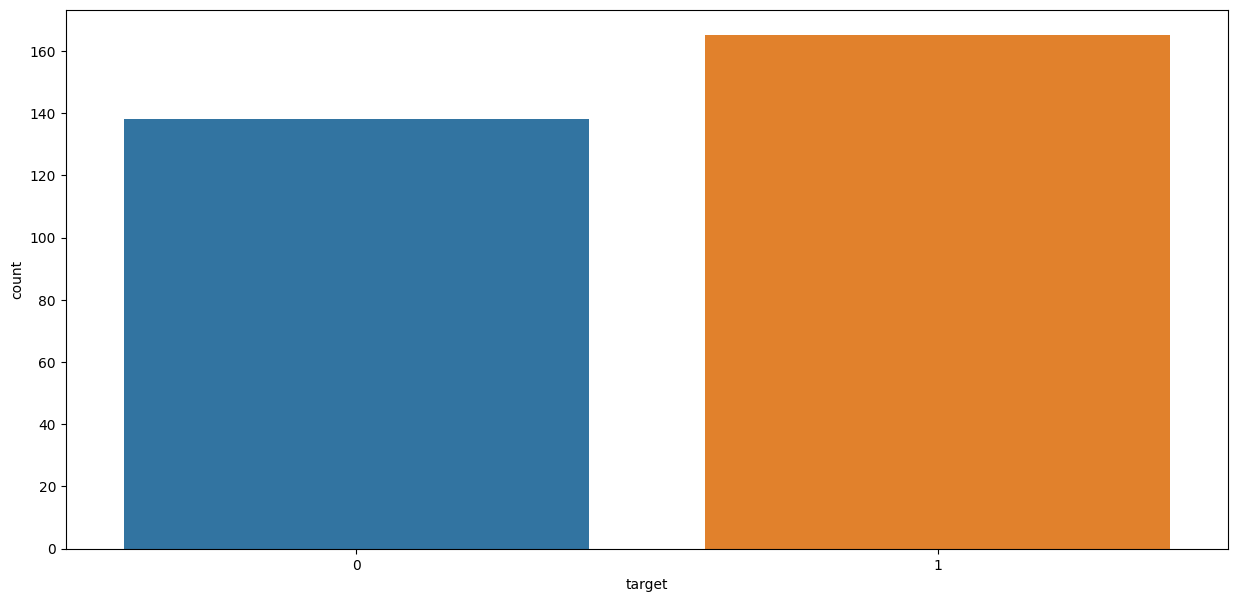

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(x = 'target', data = df_train);

In [ ]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


TO REMOVE **'bracket'** between the feature's name

In [ ]:
columns = df_train.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]','')
columns = columns.str.replace('[,]','')

In [ ]:
df_train.columns = columns


In [ ]:
df_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

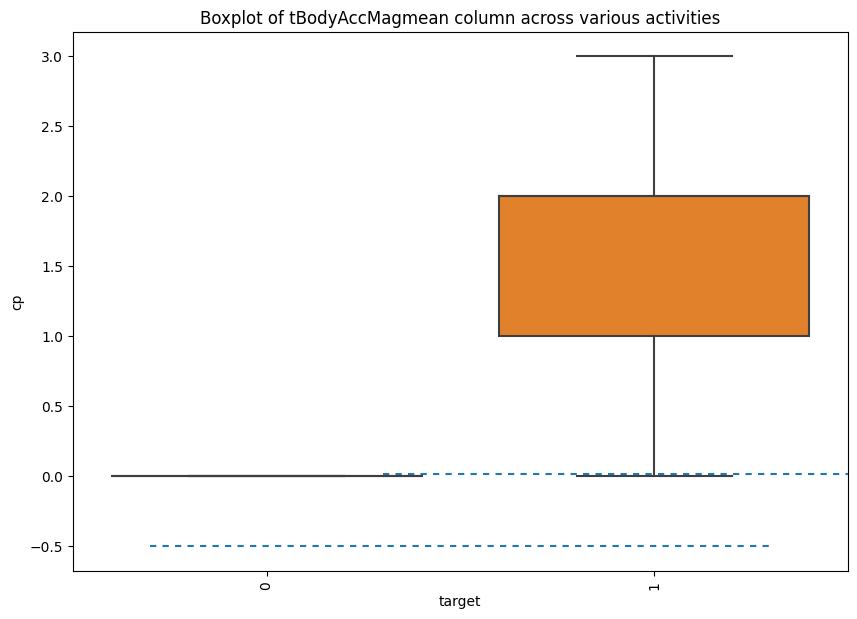

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'target', y ='cp', data = df_train, showfliers = False);

plt.title('Boxplot of tBodyAccMagmean column across various activities')
plt.axhline(y =- 0.5, xmin = 0.1, xmax = 0.9, dashes = (3,3))
plt.axhline(y = 0.020, xmin = 0.4, dashes = (3,3))
plt.xticks(rotation = 90)
plt.show()

**FROM THIS WE CAN INFER THAT:**
==>if(tBodyAccMagmean <= -0.8):
      Activity = "static"
  if(tBodyAccMagmean >= -0.6):
      Activity = "dynamic"

==>if (tBodyAccMagmean > 0.02):
    Activity = "WALKING_DOWNSTARIS"

In [ ]:
X = df_train.drop('target', axis=1)
y = df_train['target']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.manifold import TSNE
X_for_tsne = df_train.drop(['target'], axis = 1)
tsne = TSNE(random_state = 42, n_components = 2, verbose = 1, perplexity = 50, n_iter = 1000).fit_transform(X_for_tsne)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 303 samples in 0.001s...
[t-SNE] Computed neighbors for 303 samples in 0.209s...
[t-SNE] Computed conditional probabilities for sample 303 / 303
[t-SNE] Mean sigma: 21.016549
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.969795
[t-SNE] KL divergence after 850 iterations: 0.471369


<Axes: >

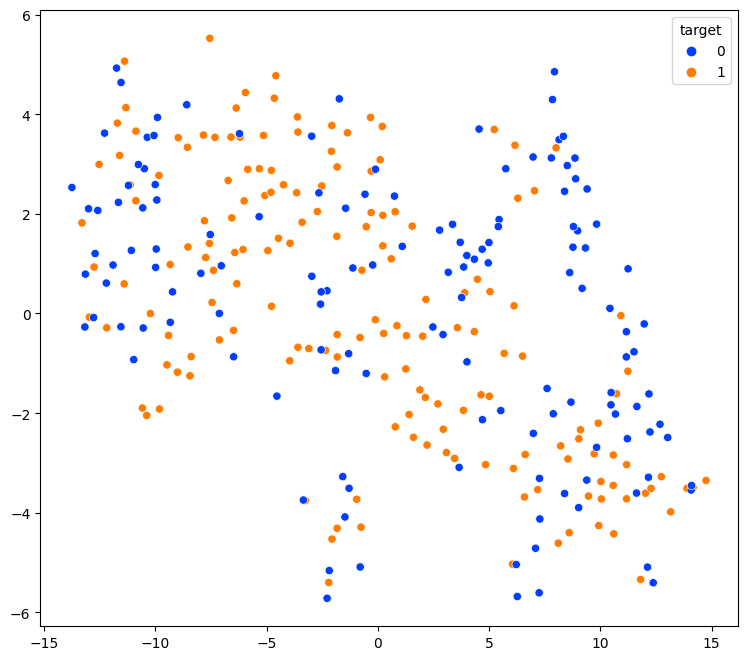

In [ ]:
plt.figure(figsize = (9,8))
sns.scatterplot(x = tsne[:,0], y = tsne[:,1], hue = df_train["target"], palette = "bright")

In [ ]:
model_score = pd.DataFrame(columns = ("Model","Score"))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [ ]:
parameters = {'C':np.arange(10,61,10),'penalty':['l2','l1']}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions = parameters, cv = 5, random_state = 42)
lr_classifier_rs.fit(X_train, y_train)
y_pred = lr_classifier_rs.predict(X_test)

In [ ]:
lr_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Accuracy using Logisitc Regression:", lr_accuracy)

Accuracy using Logisitc Regression: 0.8688524590163934


In [ ]:
lr_classifier_rs.best_estimator_

LogisticRegression(C=60)

In [ ]:
def plot_confusion_matrix(cm, lables):
    fig, ax = plt.subplots(figsize = (12,8))
    im = ax.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    ax.figure.colorbar(im, ax = ax)
    ax.set(xticks = np.arange(cm.shape[1]))
    yticks = np.arange(cm.shape[0])
    ylabel = 'True label'
    xlabel = 'Predicted label'
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i,j]), ha = "center", va = "center", color = "white" if cm[i,j]> thresh else "black")
            fig.tight_layout()


In [ ]:
model_score = model_score.append(pd.DataFrame({'Model':["LogisticRegression"],'Score':[lr_accuracy]}))

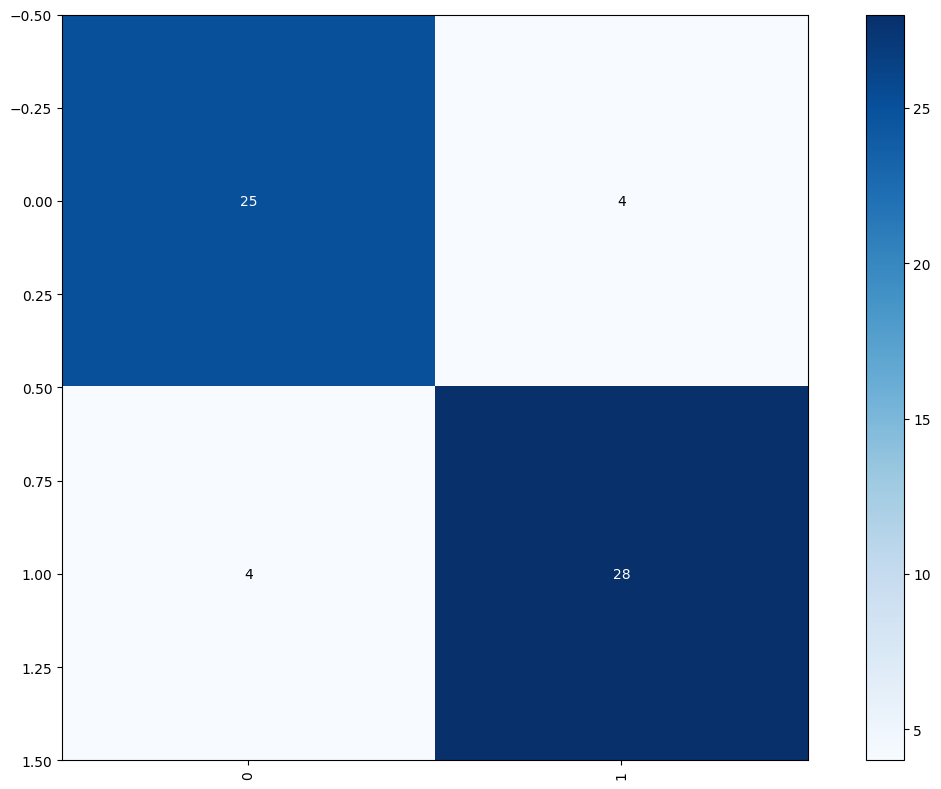

In [ ]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [ ]:
def get_best_randomsearch_results(model):
    print("Best estimator:", model.best_estimator_)
    print("Best set of parameters:", model.best_params_)
    print("Best score:", model.best_score_)

In [ ]:
get_best_randomsearch_results(lr_classifier_rs)

Best estimator: LogisticRegression(C=60)
Best set of parameters: {'penalty': 'l2', 'C': 60}
Best score: 0.8139455782312925


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
parameters = {'max_depth':np.arange(2,10,2)}
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state = 42)
dt_classifier_rs.fit(X_train, y_train)
y_pred = dt_classifier_rs.predict(X_test)

In [ ]:
dt_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Accuracy using Decision tree:", dt_accuracy)

Accuracy using Decision tree: 0.8360655737704918


In [ ]:
model_score = model_score.append(pd.DataFrame({'Model':["DecisionTrees"],'Score':[dt_accuracy]}))




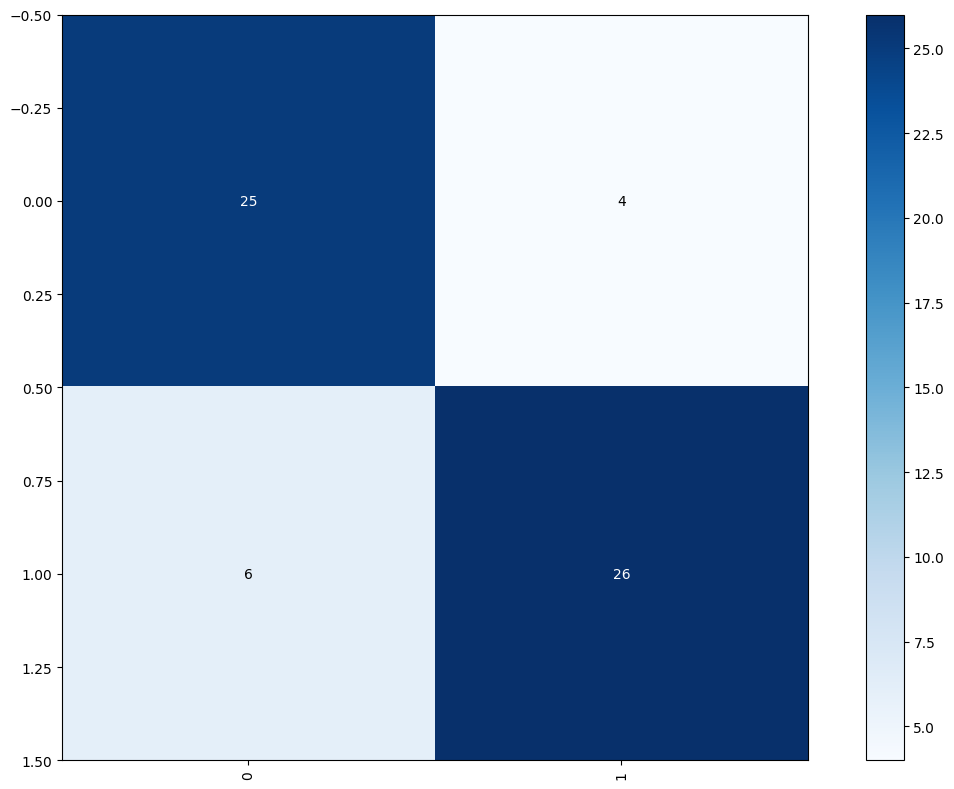

In [ ]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
params = {'n_estimators': np.arange(20,101,10), 'max_depth':np.arange(2,16,2)}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=params,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)
y_pred = rf_classifier_rs.predict(X_test)

In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using Random Forest:", rf_accuracy)

Accuracy using Random Forest: 0.8852459016393442


In [ ]:
model_score = model_score.append(pd.DataFrame({'Model':["RandomForest"],'Score':[rf_accuracy]}))

**SVM**

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
parameters = {'C': np.arange(1,12,2)}
lr_svm = LinearSVC(tol = 0.00005)
lr_svm_rs = RandomizedSearchCV(lr_svm, param_distributions = parameters, random_state = 42)
lr_svm_rs.fit(X_train, y_train)
y_pred = lr_svm_rs.predict(X_test)

In [ ]:
lr_svm_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Accuracy using Linear SVM:", lr_svm_accuracy)

Accuracy using Linear SVM: 0.47540983606557374


In [ ]:
model_score = model_score.append(pd.DataFrame({'Model':["LinearSVM"],'Score':[lr_svm_accuracy]}))

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

knn_acc=knn.score(X_test, y_test)
# Calculate the accuracy of the model
print(knn_acc)


0.7049180327868853


In [ ]:
model_score = model_score.append(pd.DataFrame({'Model':["knn"],'Score':[knn_acc]}))

In [ ]:
model_score

,Model,Score
0,LogisticRegression,0.868852
0,DecisionTrees,0.836066
0,RandomForest,0.885246
0,LinearSVM,0.475410
0,knn,0.704918
